In [1]:
import numpy as np
import pandas as pd

In [2]:
# load raw data

author_dummienm = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'author_dummies_guns_nomoder.npy')
# np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' +'sentence_vectors_guns_nomoder.npy', sentence_vecg)
speech_idsnm = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'speech_ids_guns_nomoder.npy', )
stance_7nm = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'stance_lib_7scale_guns_nomoder.npy', )
stance_binarynm = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'stance_lib_binary_guns_nomoder.npy', )
# np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'topics_hard_guns_nomoder', topics_hardg)
# np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'topics_soft_guns_nomoder', topics_softg)

In [3]:
author_dummiesg = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'author_dummies_guns_wmoder.npy')
# np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' +'sentence_vectors_guns_nomoder.npy', sentence_vecg)
speech_idsg = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'speech_ids_guns_wmoder.npy', )
stance_7g = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'stance_lib_7scale_guns_wmoder.npy', )
stance_binaryg = np.load(r'D:\projects\congress\processed\training_vectors\debatepol/' + 'stance_lib_binary_guns_wmoder.npy', )

In [4]:
nomod = stance_7g!=4

In [5]:
# load gmvae
versions = [116, 101, 100]
acc_dict = {}
for vs in versions:
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'

    parameterdict = {"masks":[0.8,  0.6,0.4, 0.2,  0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    accs = []

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')
       
#         print(slants.shape)
#         print(slants[:10])
        lightly = (stance_7g == 5)|(stance_7g == 3)
        extreme = (stance_7g > 6)|(stance_7g < 2)
        print(sum(extreme), sum(lightly))
        predict_light = slants[lightly]>0
        predict_extreme = slants[extreme]>0
#         print(predict_light.shape, predict_extreme.shape)
        
        acc_light = (predict_light*1 == stance_binaryg[lightly]).mean()
        acc_extre = (predict_extreme *1 == stance_binaryg[extreme]).mean()
        accs.append((acc_light, acc_extre))
    acc_dict[vs] = accs

2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159
2892 9159


In [6]:
print(acc_dict)

{116: [(0.8078392837646031, 0.9923928077455049), (0.704662081013211, 0.9896265560165975), (0.6368599192051534, 0.9875518672199171), (0.6199366743094225, 0.9944674965421854), (0.5697128507478982, 0.9785615491009682), (0.5323725297521563, 0.9564315352697096)], 101: [(0.8112239327437493, 0.9920470262793915), (0.7025876187356699, 0.991701244813278), (0.61666120755541, 0.9688796680497925), (0.5523528769516323, 0.9837482710926694), (0.5491865924227536, 0.9699170124481328), (0.5237471339665902, 0.956777316735823)], 100: [(0.6401353859591659, 0.9882434301521439), (0.5764821487061906, 0.9961964038727524), (0.5284419696473414, 0.9820193637621023), (0.5851075444917567, 0.9426002766251729), (0.46238672344142373, 0.783195020746888), (0.42056993121519815, 0.6721991701244814)]}


In [6]:
stance_7nm.shape[0]/5

10535.0

In [7]:
def sampling(stances, s = 10500):
    n = np.abs(stances - 4)
    sorted_inx = np.argsort(n)
#     print(n[sorted_inx])
    return sorted_inx[:s], sorted_inx[-s:]



In [9]:
# load gmvae
versions = [116, 101, 100]
acc_dict = {}
for vs in versions:
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'

    parameterdict = {"masks":[0.8,  0.6,0.4, 0.2,  0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    accs = []

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')[nomod]
        
        print(slants.shape)
#         print(slants[:10])
        lightly, extreme = sampling(stance_7nm)
        
        predict_light = slants[lightly]>0
        predict_extreme = slants[extreme]>0
#         print(predict_light.shape, predict_extreme.shape)
        
        acc_light = (predict_light*1 == stance_binarynm[lightly]).mean()
        acc_extre = (predict_extreme *1 == stance_binarynm[extreme]).mean()
        accs.append((acc_light, acc_extre))
    acc_dict[vs] = accs

(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)
(52675,)


In [10]:
print(acc_dict)

{116: [(0.8313333333333334, 0.991904761904762), (0.7415238095238095, 0.9908571428571429), (0.6815238095238095, 0.9846666666666667), (0.6592380952380953, 0.945047619047619), (0.6014285714285714, 0.8550476190476191), (0.5646666666666667, 0.818952380952381)], 101: [(0.8339047619047619, 0.992), (0.7393333333333333, 0.9913333333333333), (0.662952380952381, 0.9702857142857143), (0.6005714285714285, 0.9366666666666666), (0.582952380952381, 0.8504761904761905), (0.5568571428571428, 0.827047619047619)], 100: [(0.682952380952381, 0.979904761904762), (0.6218095238095238, 0.939047619047619), (0.5711428571428572, 0.8833333333333333), (0.6063809523809524, 0.7838095238095238), (0.48723809523809525, 0.6871428571428572), (0.4458095238095238, 0.6194285714285714)]}


In [11]:

# def normalize(a):
#     mx = a.max()
#     mi = a.min()
#     b = (a - mi)/(mx-mi)
#     return b

In [8]:
stance_binarynm.shape


(52675,)

In [23]:
# look at the aver light slant vs extreme slant, but only account for the right predicted samples
versions = [116, 101, 100]

meanstd_dict = {}
for vs in versions:
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'

    parameterdict = {"masks":[0.8,  0.6,0.4, 0.2,  0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    meadstd = []

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')[nomod]
        pred_right = (slants >0)*1 == stance_binarynm
        print(sum(pred_right))
        
#         print(slants.shape)
#         print(slants[:10])
        stance_right = stance_7nm[pred_right]
        slants_right = slants[pred_right]
        lightly, extreme = sampling(stance_right)
        order = np.argsort(slants_right)
        rank = np.argsort(order)
        predict_light = np.abs(rank[lightly] - np.median(rank))
        predict_extreme = np.abs(rank[extreme] - np.median(rank))
#         print(rank.min(), rank.max(), np.median(rank))
        lightrank_m, lightrank_std = predict_light.mean(), predict_light.std()
        extrerank_m, extrerank_std = predict_extreme.mean(), predict_extreme.std()
        meadstd.append((lightrank_m,  extrerank_m, extrerank_m - lightrank_m))
    meanstd_dict[vs] = meadstd

50572
49566
48686
46304
41300
39090
50568
49593
47901
45359
40934
39335
48447
45640
42383
38203
33292
30202


In [24]:
meanstd_dict

{116: [(11570.580285714286, 12791.207904761905, 1220.6276190476183),
  (10852.233714285714, 12774.059904761905, 1921.8261904761912),
  (10412.338476190476, 12541.746190476191, 2129.407714285715),
  (9571.169714285714, 12243.147238095238, 2671.9775238095244),
  (8843.101333333334, 11095.923047619048, 2252.821714285714),
  (8359.95542857143, 10490.539904761905, 2130.5844761904755)],
 101: [(11440.014476190476, 12747.555238095238, 1307.540761904762),
  (10750.791619047619, 12761.79361904762, 2011.0020000000004),
  (10597.066285714285, 12297.208, 1700.1417142857154),
  (9686.250952380953, 11940.245142857142, 2253.994190476189),
  (8687.61761904762, 11055.320857142857, 2367.703238095237),
  (8491.96238095238, 10536.324857142858, 2044.3624761904775)],
 100: [(11235.661904761904, 12337.380095238095, 1101.718190476191),
  (10285.443142857142, 11832.498285714286, 1547.0551428571434),
  (9814.460380952381, 11102.233047619047, 1287.7726666666658),
  (8976.873142857143, 10189.89419047619, 1213.021

In [28]:
lightly

array([14469,  7334,  7335, ..., 38271, 38251, 36555], dtype=int64)

In [29]:
# look at the aver light slant vs extreme slant, but only account for the right predicted samples
versions = [116, 101, 100]
meanstd_dict = {}
for vs in versions:
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'

    parameterdict = {"masks":[0.8,  0.6,0.4, 0.2,  0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    meadstd = []

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')[nomod]
        pred_right = (slants >0)*1 == stance_binarynm
        print(sum(pred_right))

        lightly, extreme = sampling(stance_7nm)
        order = np.argsort(slants)
        rank = np.argsort(order)
        lightly_ = np.array([False for i in range(len(rank))])
        lightly_[lightly] = True
        extreme_ = np.array([False for i in range(len(rank))])
        extreme_[extreme] = True
        predict_light = np.abs(rank[lightly_&pred_right] - np.median(rank))
        predict_extreme = np.abs(rank[extreme_&pred_right] - np.median(rank))
#         print(rank.min(), rank.max(), np.median(rank))
        lightrank_m, lightrank_std = predict_light.mean(), predict_light.std()
        extrerank_m, extrerank_std = predict_extreme.mean(), predict_extreme.std()
        meadstd.append((lightrank_m,  extrerank_m, extrerank_m - lightrank_m))
    meanstd_dict[vs] = meadstd

50572
49566
48686
46304
41300
39090
50568
49593
47901
45359
40934
39335
48447
45640
42383
38203
33292
30202


In [30]:
meanstd_dict

{116: [(11995.769503952342, 13703.048103696592, 1707.2785997442497),
  (11200.980220909325, 14031.372837370242, 2830.3926164609165),
  (10588.097959754052, 14188.410871457589, 3600.312911703537),
  (10101.444380236926, 14742.262521414894, 4640.818141177968),
  (10714.234362628662, 15436.524058810426, 4722.289696181764),
  (10596.148760330578, 15513.155134317944, 4917.006373987366)],
 101: [(11912.425308359981, 13602.03216205837, 1689.6068536983894),
  (11043.33530851475, 14027.817753866846, 2984.482445352096),
  (11421.040367763253, 14309.096093443266, 2888.055725680013),
  (10573.510149064383, 14892.06446365023, 4318.554314585846),
  (10765.364482927625, 15678.647480403135, 4913.28299747551),
  (10627.07730460065, 15405.84454168586, 4778.767237085209)],
 100: [(11975.831962069446, 13964.900281854407, 1989.0683197849612),
  (11604.28350436514, 14466.956186612577, 2862.6726822474375),
  (12290.927797231949, 14982.747924528301, 2691.8201272963524),
  (12602.055442123448, 14956.1328068043

In [ ]:
# plots over here

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
versions = [116,  100]
modelname = {116: "BBBG-VAE", 100: "MLP"}
data_dict = {}
for vs in versions:
    modeln = modelname[vs]
    print(modeln)
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'

    parameterdict = {"masks":[0.8,  0.6,0.4, 0.2,  0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    maskeddatadict = {"Ideology Group": [], "Rank Deviation":[], 'Supervision Level': []}

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')[nomod]
        pred_right = (slants >0)*1 == stance_binarynm
        print(sum(pred_right))

        lightly, extreme = sampling(stance_7nm)
        order = np.argsort(slants)
        rank = np.argsort(order)
        lightly_ = np.array([False for i in range(len(rank))])
        lightly_[lightly] = True
        extreme_ = np.array([False for i in range(len(rank))])
        extreme_[extreme] = True
        predict_light = np.abs(rank[lightly_&pred_right] - np.median(rank))
        predict_extreme = np.abs(rank[extreme_&pred_right] - np.median(rank))
        
        is_light = ['slight_leaning'] * len(predict_light) + ['extreme'] * len(predict_extreme)
        all_predicts = list(predict_light) + list(predict_extreme)
        mss = [msk] * (len(predict_light) + len(predict_extreme))
        assert len(is_light) == len(all_predicts) == len(mss), 'length not match'
        maskeddatadict['Ideology Group'] += is_light
        maskeddatadict['Rank Deviation'] += all_predicts
        maskeddatadict['Supervision Level'] += mss

        
    data_dict[vs] = maskeddatadict

BBBG-VAE
50572
49566
48686
46304
41300
39090
MLP
48447
45640
42383
38203
33292
30202


In [22]:
dfs= []
modelname = {116: "BBBG-VAE", 100: "MLP"}
for vs in versions:
    df = pd.DataFrame(data_dict[vs])
    df['version'] = modelname[vs]
    
    print(df.head())
#     g = sns.boxplot(x="mask", y="predict_rank", hue="islight",
#                  data=df, whis = 0.5,palette="Set2", showfliers =False , showcaps = False)
#     g.legend_.remove()
    dfs.append(df)

all_df = pd.concat(dfs, axis = 0)


   Ideology Group  Rank Deviation  Supervision Level   version
0  slight_leaning         22944.0                0.8  BBBG-VAE
1  slight_leaning         23043.0                0.8  BBBG-VAE
2  slight_leaning         18465.0                0.8  BBBG-VAE
3  slight_leaning          1996.0                0.8  BBBG-VAE
4  slight_leaning         19765.0                0.8  BBBG-VAE
   Ideology Group  Rank Deviation  Supervision Level version
0  slight_leaning         14875.0                0.8     MLP
1  slight_leaning         21318.0                0.8     MLP
2  slight_leaning         11010.0                0.8     MLP
3  slight_leaning           951.0                0.8     MLP
4  slight_leaning           878.0                0.8     MLP


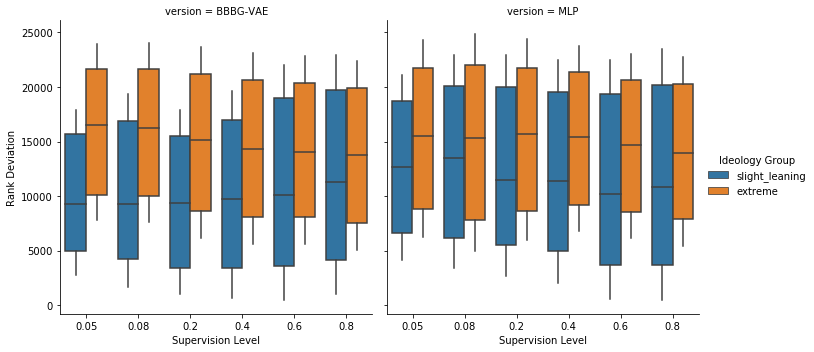

In [23]:

g = sns.catplot(x="Supervision Level", y="Rank Deviation", hue="Ideology Group", col = 'version',
                 data= all_df, whis = 0.2, showfliers =False , showcaps = False, kind="box")
# g.legend_.remove()

In [24]:
all_df

,Ideology Group,Rank Deviation,Supervision Level,version
0,slight_leaning,22944.0,0.80,BBBG-VAE
1,slight_leaning,23043.0,0.80,BBBG-VAE
2,slight_leaning,18465.0,0.80,BBBG-VAE
3,slight_leaning,1996.0,0.80,BBBG-VAE
4,slight_leaning,19765.0,0.80,BBBG-VAE
...,...,...,...,...
87229,extreme,14806.0,0.05,MLP
87230,extreme,16982.0,0.05,MLP
87231,extreme,19054.0,0.05,MLP
87232,extreme,18538.0,0.05,MLP


In [ ]:
# moderate analysis here

46304
41300
39090


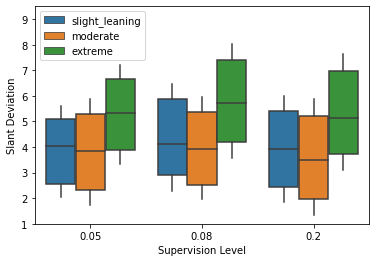

In [31]:
# load gmvae
versions = [116]
modelname = {116: "BBBG-VAE", 100: "MLP"}
for vs in versions:
    datapath = f'D:\\projects\\congress\\results\\debatepol\\test/debate_pred_v{vs}.2/'
    
    modeln = modelname[vs]
    parameterdict = {"masks":[  0.2, 0.08, 0.05 ],  'epochs':[15]} # epochs = 10

    parametergrid = [[i, j] for i in parameterdict['masks'] for j in parameterdict['epochs']]
    maskedmoddict = {"Ideology Group": [], "Slant Deviation":[], 'Supervision Level': []}

    for msk, epc in parametergrid:
        versname = "msk_{}_epc_{}_{}".format(msk, epc, 'biased')
        resultdir = datapath + versname + '/'
        slants = np.load(resultdir + 'predicted_slant_gun_topics_withmoder.npy')
        modslant = np.abs(slants[~nomod])
        slants_ = slants[nomod]
        pred_right = (slants_ >0)*1 == stance_binarynm
        print(sum(pred_right))

        lightly, extreme = sampling(stance_7nm)

        lightly_ = np.array([False for i in range(len(slants_))])
        lightly_[lightly] = True
        extreme_ = np.array([False for i in range(len(slants_))])
        extreme_[extreme] = True
        predict_light = np.abs(slants_[lightly_&pred_right])
        predict_extreme = np.abs(slants_[extreme_&pred_right])
        l, m, e = len(predict_light), len(modslant), len(predict_extreme)
        maskedmoddict['Slant Deviation'] += list(predict_light) + list(modslant) + list(predict_extreme)
        maskedmoddict['Supervision Level'] += [msk] * (l+m+e)
        maskedmoddict['Ideology Group'] += ['slight_leaning']*l + ['moderate']*m + ['extreme'] * e
#     assert len(maskedmoddict['predict_slant']) ==len(maskedmoddict['mask']) ==len(maskedmoddict['ideology']), 'length wrong'
    
    df = pd.DataFrame(maskedmoddict)
    g = sns.boxplot(x="Supervision Level", y="Slant Deviation", hue="Ideology Group",
                 data=df, whis = 0.2,  showfliers =False , showcaps = False)
    plt.legend(loc='upper left')
    plt.ylim([1, 9.5])

#     g.legend_.remove()
    

In [12]:
modslant, lightslant

(array([ 5.078299  , -3.1396053 ,  0.5722583 , ...,  3.0798228 ,
         0.43836284, -5.010821  ], dtype=float32),
 array([ 1.7729305 , -0.10561466, -2.9187868 , ..., -0.766145  ,
        -4.990859  ,  2.5371587 ], dtype=float32))